We have implemented the bootstrapping method in the file `bootstrap.py`. In this notebook, we illustrate it on the calculation of the quantile of a distribution. You may want to have a look at the implementation first.

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from bootstrap import bootstrap
import scipy.stats

The following function generates the function requested by the bootstrap algorithm.

In [2]:
def quantile(the_q):
    def the_function(the_data):
        return np.quantile(the_data, the_q)
    return the_function


We illustrate this procedure by generating data from a uniform or a normal distribution.

In [3]:
#demo = 'normal'
demo = 'uniform'

In [4]:
largest = 10000
the_quantile = 0.99
the_theoretical_all = {
    'uniform': the_quantile,
    'normal': scipy.stats.norm.ppf(the_quantile),
}
data_all = {
    'uniform': np.random.uniform(size=largest),
    'normal': np.random.normal(size=largest)
}
the_theoretical = the_theoretical_all[demo]
data = data_all[demo]


In [5]:
r = range(100, largest)

In [6]:
results = [bootstrap(quantile(the_quantile), data[:r]) for r in tqdm(r)]

100%|██████████| 9900/9900 [03:26<00:00, 47.94it/s]


We organize the results for the plot. Note that we report the square root of the MSE called the Root Means Square Error (RMSE)

In [7]:
q, mse, CI_low, CI_high = zip(*results)
q = np.array(q)
mse = np.array(mse)
rmse = np.sqrt(mse)

The following plot represents the estimate of the quantile as a function of the sample size, together with the bootstrap estimate of the 90% confidence interval, and the bootstrap estimate of the RMSE.

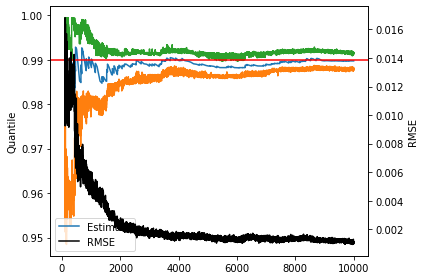

In [8]:
_, ax1 = plt.subplots()
ax1.set_ylabel('Quantile')
plt_estimate = ax1.plot(r, q, label='Estimate')
ax1.plot(r, CI_low, r, CI_high)
ax1.axhline(y=the_theoretical, color='r', linestyle='-', label='True value')
ax2 = ax1.twinx()
ax2.set_ylabel('RMSE')
plt_rmse = ax2.plot(r, rmse, color='black', label='RMSE')
the_plots = plt_estimate + plt_rmse
labels = [ell.get_label() for ell in the_plots]
ax1.legend(the_plots, labels, loc=3)
plt.tight_layout()
plt.show()

It is important to note that, in general, the confidence interval is not defined by twice the RMSE (as suggested on some webpages, if you Google it). Indeed, such a practice is based on the assumption that the estimate is normally distributed. But the estimator of the quantile is not necessarily normally distributed. In particular, the quantile of the uniform distribution is bounded from above by 1.0. Therefore, the estimate will never take any value above one and, therefore, the upper bound of the confidence interval will always be less or equal to 1.0.  